In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#identifying the target variable
print("variables=",df['class'].unique(),'\nnumber of variables=' ,df['class'].nunique())

variables= ['p' 'e'] 
number of variables= 2


The Class is the target variable. P-Poisonous, E-Edible

In [4]:
df.shape

(8124, 23)

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [8]:
#checking for null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])
df
    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [12]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [13]:
df['veil-type'].nunique()

1

In [14]:
#Droping the column veil-type as it only has a single value
df.drop(['veil-type'],inplace=True,axis=1)

class                          AxesSubplot(0.125,0.851183;0.227941x0.0288168)
cap-shape                   AxesSubplot(0.398529,0.851183;0.227941x0.0288168)
cap-surface                 AxesSubplot(0.672059,0.851183;0.227941x0.0288168)
cap-color                      AxesSubplot(0.125,0.816603;0.227941x0.0288168)
bruises                     AxesSubplot(0.398529,0.816603;0.227941x0.0288168)
odor                        AxesSubplot(0.672059,0.816603;0.227941x0.0288168)
gill-attachment                AxesSubplot(0.125,0.782023;0.227941x0.0288168)
gill-spacing                AxesSubplot(0.398529,0.782023;0.227941x0.0288168)
gill-size                   AxesSubplot(0.672059,0.782023;0.227941x0.0288168)
gill-color                     AxesSubplot(0.125,0.747443;0.227941x0.0288168)
stalk-shape                 AxesSubplot(0.398529,0.747443;0.227941x0.0288168)
stalk-root                  AxesSubplot(0.672059,0.747443;0.227941x0.0288168)
stalk-surface-above-ring       AxesSubplot(0.125,0.712863;0.2279

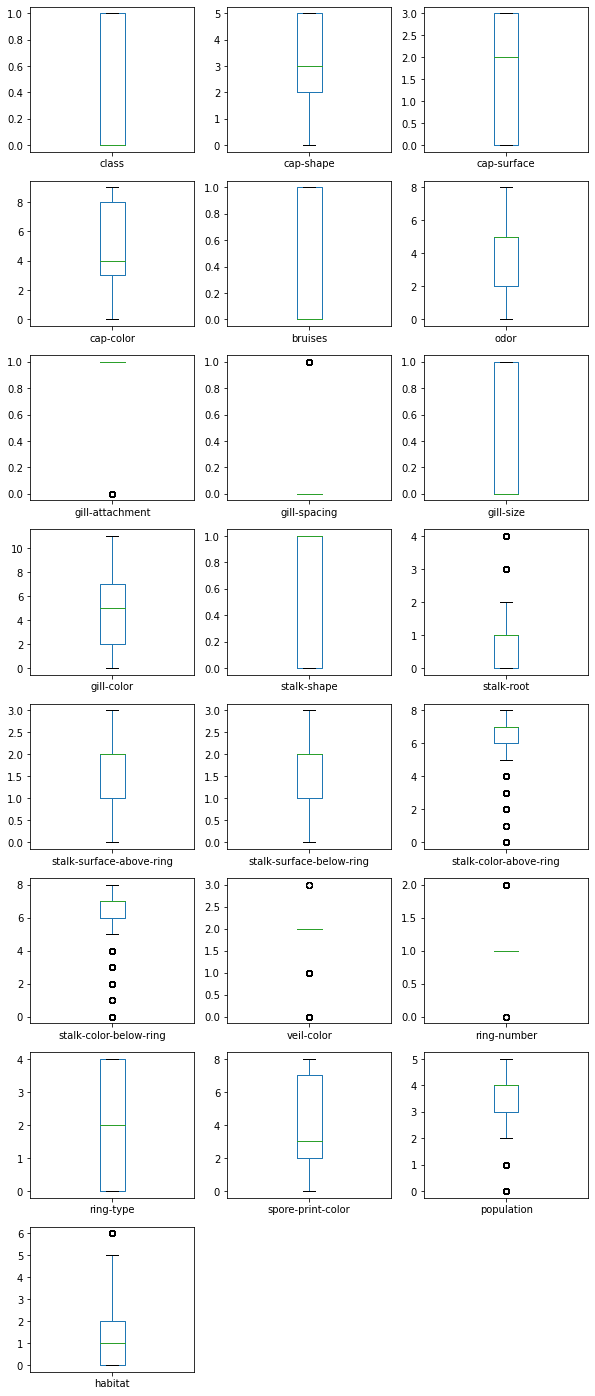

In [15]:
#univariate analysis
df.plot(kind='box', layout=(22,3),subplots=True,figsize=(10,70))

In [16]:
#Checking the correlation
dfcor=df.corr()
dfcor


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

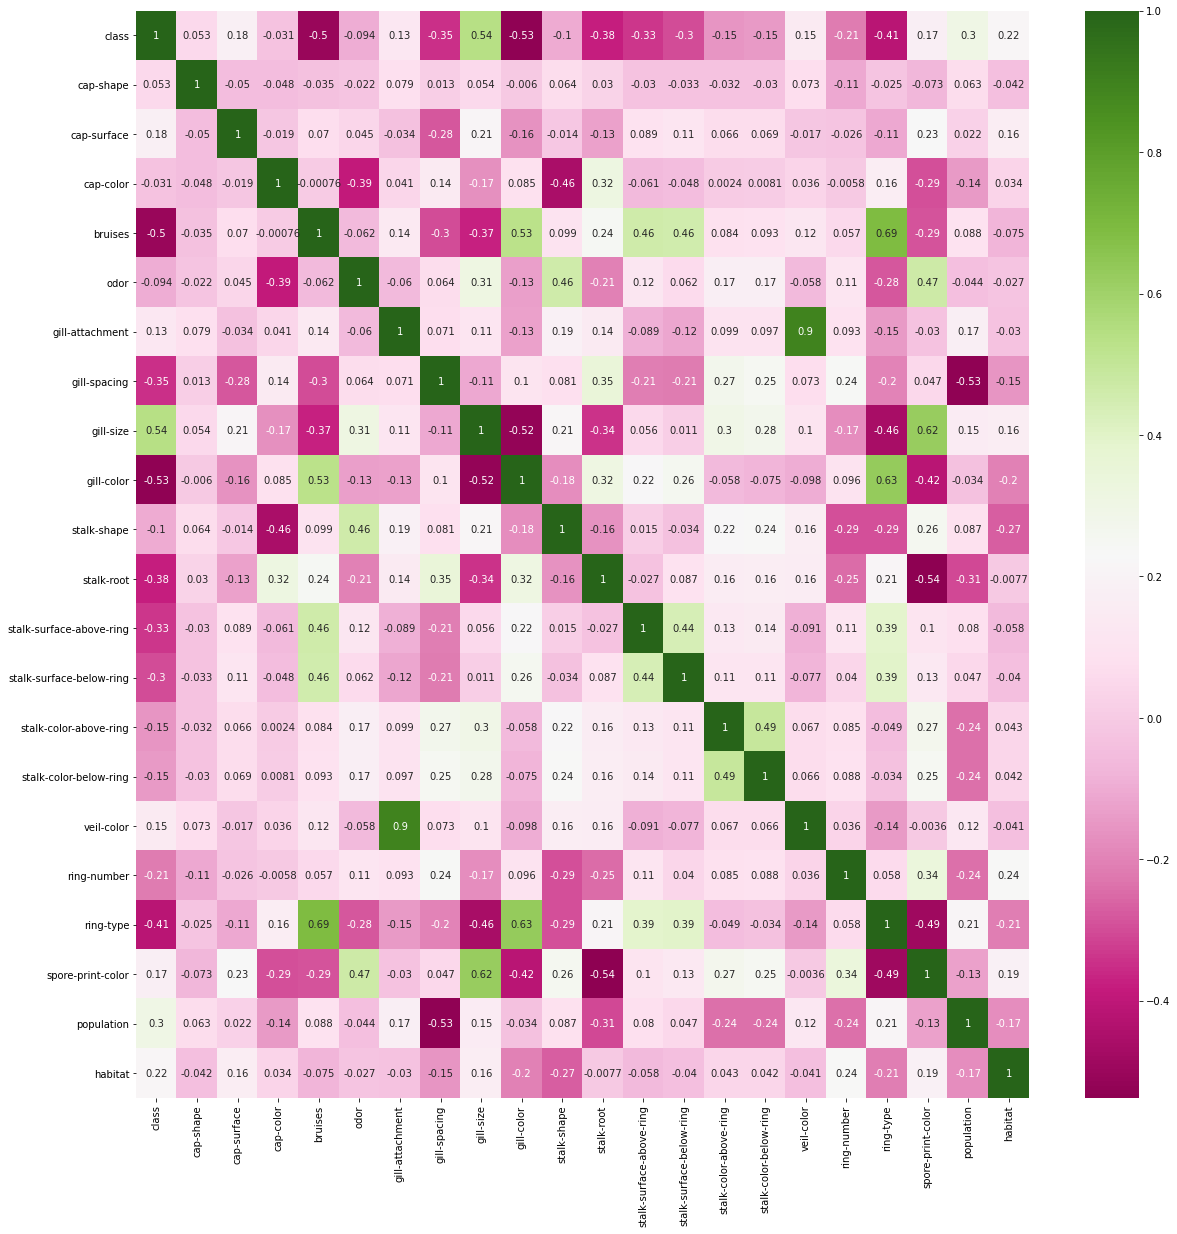

In [17]:
#plotting Correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap="PiYG")

<AxesSubplot:xlabel='class', ylabel='count'>

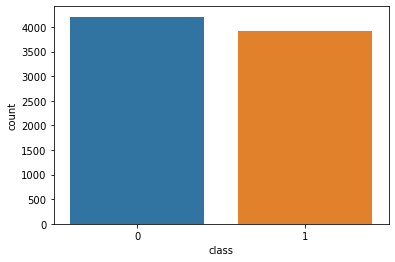

In [18]:
#checking the countplot of the target variable
sns.countplot(x=df['class'])

In [19]:
##sns.pairplot(df)

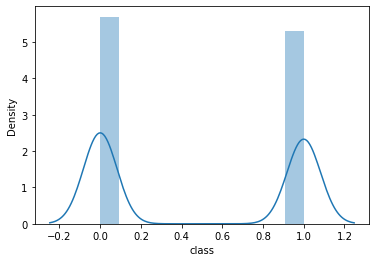

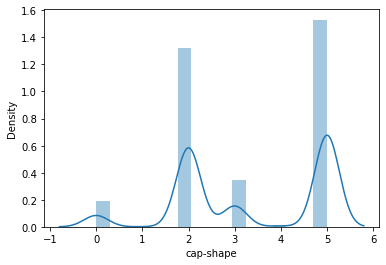

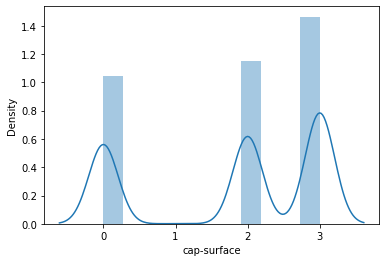

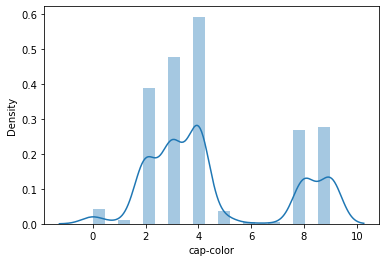

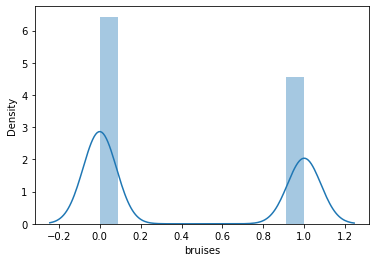

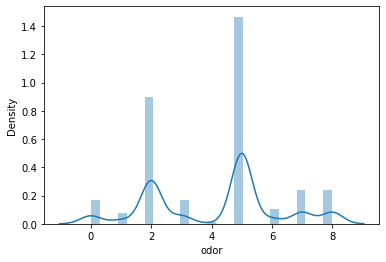

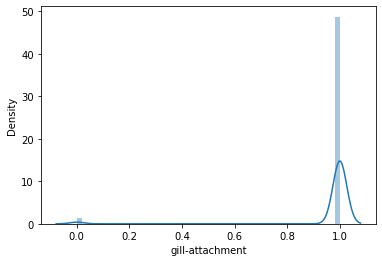

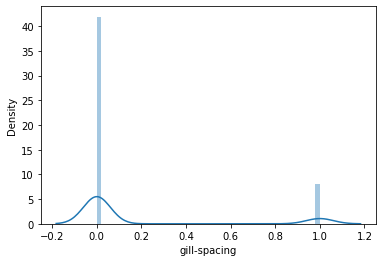

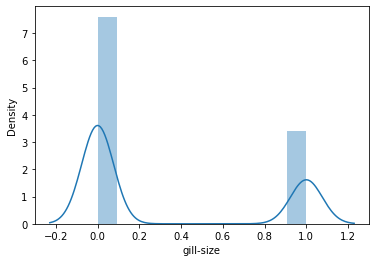

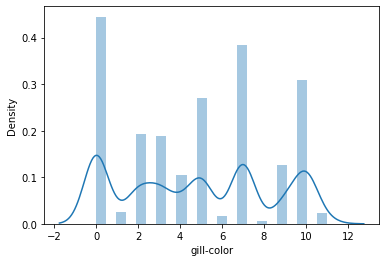

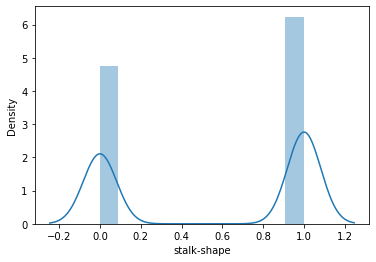

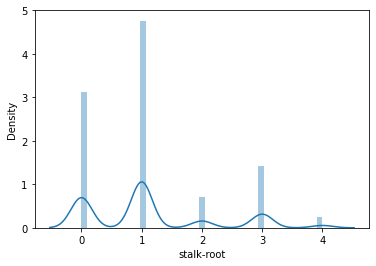

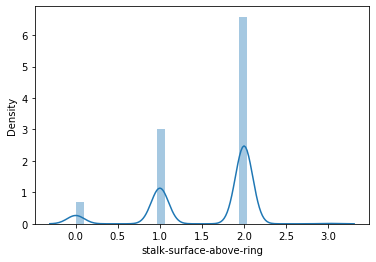

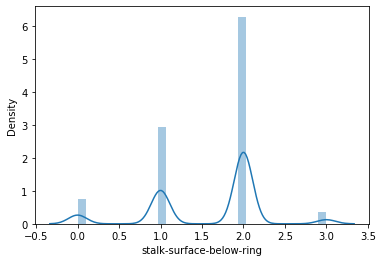

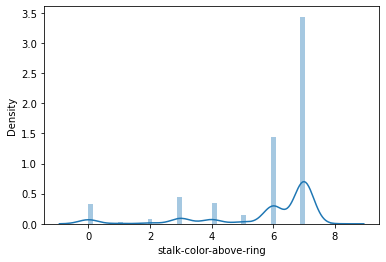

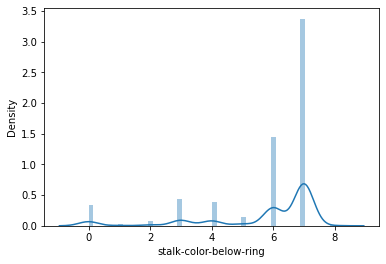

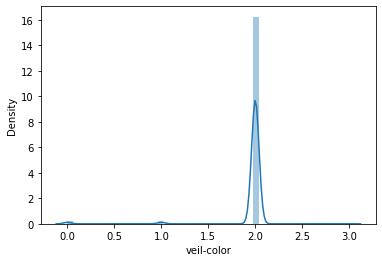

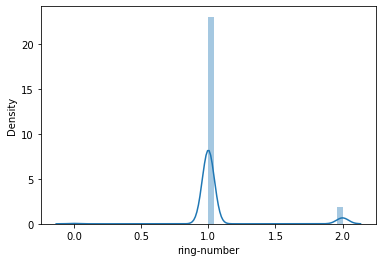

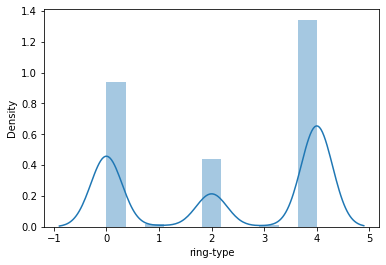

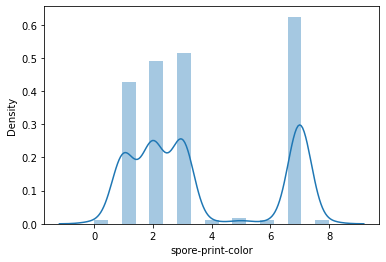

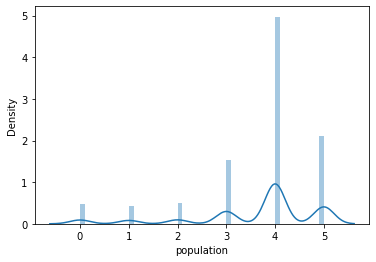

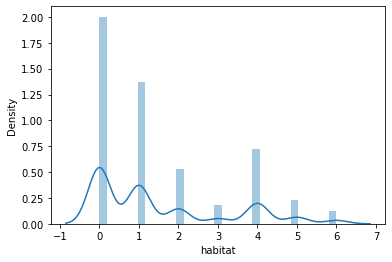

In [20]:
cols=df.columns
for i in cols:
    plt.subplots()
    sns.distplot(df[i])

In [21]:
df['veil-color'].value_counts()

2    7924
1      96
0      96
3       8
Name: veil-color, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [24]:
x=df.iloc[:,1:]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [25]:
y=df.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [27]:
x_train.shape

(6093, 21)

In [28]:
x_test.shape

(2031, 21)

In [29]:
y_train.shape

(6093,)

In [30]:
y_test.shape

(2031,)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [32]:
def model(mod):
    print("Model:",mod)
    mod.fit(x_train, y_train)
    mod.score(x_train, y_train)
    pred = mod.predict(x_test)
    print(confusion_matrix(y_test, pred))
    print('\n')
    print('\n')
    print(classification_report(y_test, pred))
    crossval_scores = cross_val_score(mod, x, y, cv = 5)
    accuracy=accuracy_score(y_test, pred)
    print("Accuracy score:",accuracy)
    print('Cross validation Scores for ', mod)
    print(crossval_scores)
    print('\n')
    mean_crossval=crossval_scores.mean()
    print('Mean Score: ',mean_crossval)
    difference=accuracy-mean_crossval
    print('difference between crossvalidation score and actual score:',difference)
    

## LogisticRegression

In [33]:
model(LogisticRegression())

Model: LogisticRegression()
[[1037   47]
 [  59  888]]




              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1084
           1       0.95      0.94      0.94       947

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

Accuracy score: 0.947808961102905
Cross validation Scores for  LogisticRegression()
[0.63015385 0.984      0.87569231 0.99815385 0.71366995]


Mean Score:  0.8403339901477832
difference between crossvalidation score and actual score: 0.10747497095512182


### GaussianNB()

In [34]:
model(GaussianNB())

Model: GaussianNB()
[[1004   80]
 [  83  864]]




              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1084
           1       0.92      0.91      0.91       947

    accuracy                           0.92      2031
   macro avg       0.92      0.92      0.92      2031
weighted avg       0.92      0.92      0.92      2031

Accuracy score: 0.9197439684884293
Cross validation Scores for  GaussianNB()
[0.72923077 0.96123077 0.79261538 0.65230769 0.49445813]


Mean Score:  0.7259685486926866
difference between crossvalidation score and actual score: 0.19377541979574275


### RFC

In [35]:
model(RandomForestClassifier())

Model: RandomForestClassifier()
[[1084    0]
 [   0  947]]




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       1.00      1.00      1.00       947

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Accuracy score: 1.0
Cross validation Scores for  RandomForestClassifier()
[0.84246154 1.         0.99938462 1.         0.5658867 ]


Mean Score:  0.8815465706707085
difference between crossvalidation score and actual score: 0.11845342932929148


### KNeighborsClassifier

In [36]:
model(KNeighborsClassifier())

Model: KNeighborsClassifier()
[[1078    6]
 [   0  947]]




              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1084
           1       0.99      1.00      1.00       947

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Accuracy score: 0.9970457902511078
Cross validation Scores for  KNeighborsClassifier()
[0.84492308 0.99753846 0.93169231 1.         0.63362069]


Mean Score:  0.8815549071618036
difference between crossvalidation score and actual score: 0.11549088308930422


### DecisionTreeClassifier

In [37]:
model(DecisionTreeClassifier())

Model: DecisionTreeClassifier()
[[1084    0]
 [   0  947]]




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       1.00      1.00      1.00       947

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Accuracy score: 1.0
Cross validation Scores for  DecisionTreeClassifier()
[0.88184615 1.         0.99753846 1.         0.74876847]


Mean Score:  0.9256306176582039
difference between crossvalidation score and actual score: 0.07436938234179613


### SVC

In [38]:
ker=['rbf','poly','linear']
for i in ker:
    print('SVC kernel:',i)
    model(SVC(kernel=i))
    print('\n')

SVC kernel: rbf
Model: SVC()
[[1081    3]
 [  26  921]]




              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1084
           1       1.00      0.97      0.98       947

    accuracy                           0.99      2031
   macro avg       0.99      0.98      0.99      2031
weighted avg       0.99      0.99      0.99      2031

Accuracy score: 0.9857213195470211
Cross validation Scores for  SVC()
[0.816      0.99569231 0.89907692 1.         0.49938424]


Mean Score:  0.8420306934444864
difference between crossvalidation score and actual score: 0.1436906261025347


SVC kernel: poly
Model: SVC(kernel='poly')
[[1084    0]
 [   8  939]]




              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1084
           1       1.00      0.99      1.00       947

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00   

As per the above observations the Decision tree classisfier seems to be the best stable model

In [39]:
import joblib

In [40]:
#Importing Dtc as '.obj'

dfc=joblib.dump(DecisionTreeClassifier(),'mushrooms.obj')